# **Load Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset to the Python environment.**

In [3]:
data = pd.read_csv("/content/Election_Kerala_Project.csv")
data.drop('Sl.No',inplace=True,axis=1)

In [4]:
data.head()

,Assembly_No,Year,Position,Candidate,Sex,Party,Votes,Valid_Votes,Electors,Constituency_Name,...,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,Party_Type_TCPD,Turncoat,Incumbent,MyNeta_education,TCPD_Prof_Main
0,17,2019,1,Rajmohan Unnithan,M,INC,474961,1100051,1363937,KASARAGOD,...,80.65,43.18,no,40438,3.68,National Party,False,False,Graduate,Social Work
1,17,2019,2,K. P. Sathishchandran,M,CPM,434523,1100051,1363937,KASARAGOD,...,80.65,39.50,no,258474,23.50,National Party,False,False,Graduate,Politics
2,17,2019,3,Ravisha Thanthri Kuntar,M,BJP,176049,1100051,1363937,KASARAGOD,...,80.65,16.00,yes,171632,15.60,National Party,False,False,10th Pass,Agriculture
3,17,2019,4,NOTA,NaN,NOTA,4417,1100051,1363937,KASARAGOD,...,80.65,0.40,NaN,1747,0.16,NOTA,NaN,NaN,NaN,NaN
4,17,2019,5,Govindan B Alinthazhe,M,IND,2670,1100051,1363937,KASARAGOD,...,80.65,0.24,yes,760,0.07,Independents,False,False,Literate,Other


In [5]:
data.shape

(2366, 21)

In [6]:
##statistical information
data.describe()

,Assembly_No,Year,Position,Votes,Valid_Votes,Electors,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage
count,2366.000000,2366.000000,2366.000000,2366.000000,2.366000e+03,2.366000e+03,2366.000000,2366.000000,2366.000000,2366.000000
mean,11.783601,1997.752325,5.702874,82274.916314,7.300604e+05,1.000993e+06,72.675773,12.806412,38305.871936,5.880655
std,3.865454,14.741248,4.062312,133058.131752,1.918612e+05,2.391630e+05,6.167611,19.754232,78111.367640,11.636690
min,3.000000,1962.000000,1.000000,134.000000,2.006910e+05,4.096620e+05,45.250000,0.020000,0.000000,0.000000
25%,9.000000,1989.000000,2.000000,1220.000000,6.763900e+05,9.369520e+05,69.010000,0.160000,90.000000,0.010000
50%,12.000000,1998.000000,5.000000,3965.000000,7.458710e+05,1.036913e+06,73.535000,0.530000,857.000000,0.110000
75%,15.000000,2009.000000,8.000000,134083.750000,8.508340e+05,1.158735e+06,76.840000,31.155000,32669.250000,4.965000
max,17.000000,2021.000000,21.000000,706367.000000,1.100051e+06,1.438951e+06,90.000000,68.540000,431770.000000,47.240000


# **Checking null values**

In [7]:
data.isna().sum()

Assembly_No                 0
Year                        0
Position                    0
Candidate                   0
Sex                        41
Party                       1
Votes                       0
Valid_Votes                 0
Electors                    0
Constituency_Name           0
Constituency_Type           0
Turnout_Percentage          0
Vote_Share_Percentage       0
Deposit_Lost               41
Margin                      0
Margin_Percentage           0
Party_Type_TCPD            14
Turncoat                   41
Incumbent                  41
MyNeta_education         1657
TCPD_Prof_Main           1618
dtype: int64

In [8]:
# fillining education details
data["MyNeta_education"].fillna("Not Available", inplace=True)

In [9]:
data.dropna(axis=0, subset=["Party"], inplace=True)

In [10]:
##checking duplicates
##duplicates
data.duplicated().sum()##checking duplicate rows

0

<Axes: xlabel='Turnout_Percentage'>

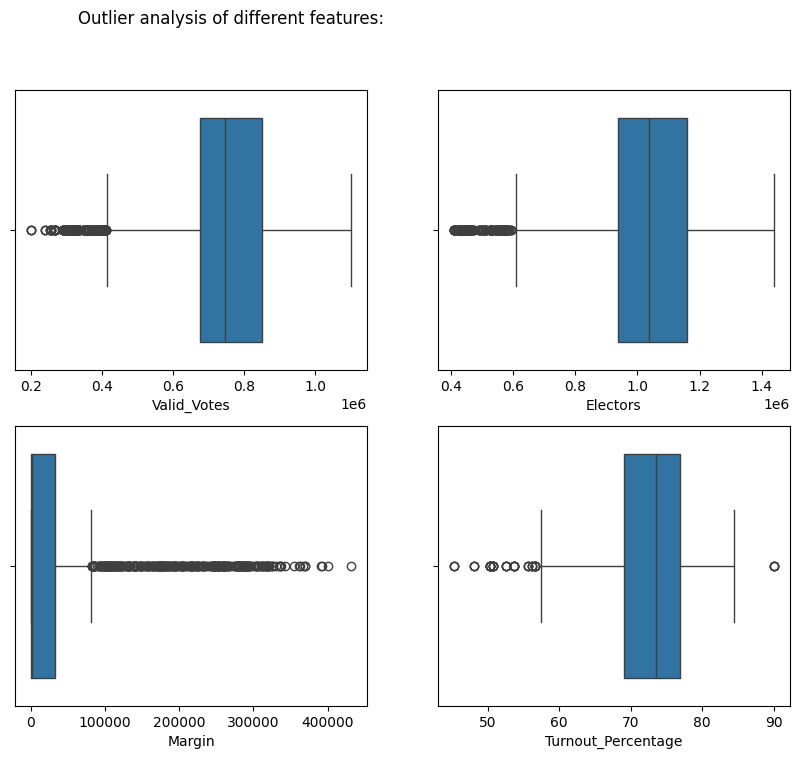

In [11]:
#outlier Analysis

plt.figure(figsize=(10,8))
plt.suptitle("Outlier analysis of different features: ", ha = "right")
plt.subplot(2,2,1)
sns.boxplot(x = data["Valid_Votes"])

plt.subplot(2,2,2)
sns.boxplot(x = data["Electors"])

plt.subplot(2,2,3)
sns.boxplot(x = data["Margin"])

plt.subplot(2,2,4)
sns.boxplot(x = data["Turnout_Percentage"])

In [12]:
#adding result column

data["Result"] = 0

result = []

for i in data["Position"]:
    if i == 1:
        result.append(1)
    else:
        result.append(0)

In [13]:
data[data["Position"]==1].shape

(303, 22)

In [14]:
data["Result"] = result
print(data["Result"].value_counts())

Result
0    2062
1     303
Name: count, dtype: int64


In [15]:
data.head()

,Assembly_No,Year,Position,Candidate,Sex,Party,Votes,Valid_Votes,Electors,Constituency_Name,...,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,Party_Type_TCPD,Turncoat,Incumbent,MyNeta_education,TCPD_Prof_Main,Result
0,17,2019,1,Rajmohan Unnithan,M,INC,474961,1100051,1363937,KASARAGOD,...,43.18,no,40438,3.68,National Party,False,False,Graduate,Social Work,1
1,17,2019,2,K. P. Sathishchandran,M,CPM,434523,1100051,1363937,KASARAGOD,...,39.50,no,258474,23.50,National Party,False,False,Graduate,Politics,0
2,17,2019,3,Ravisha Thanthri Kuntar,M,BJP,176049,1100051,1363937,KASARAGOD,...,16.00,yes,171632,15.60,National Party,False,False,10th Pass,Agriculture,0
3,17,2019,4,NOTA,NaN,NOTA,4417,1100051,1363937,KASARAGOD,...,0.40,NaN,1747,0.16,NOTA,NaN,NaN,Not Available,NaN,0
4,17,2019,5,Govindan B Alinthazhe,M,IND,2670,1100051,1363937,KASARAGOD,...,0.24,yes,760,0.07,Independents,False,False,Literate,Other,0


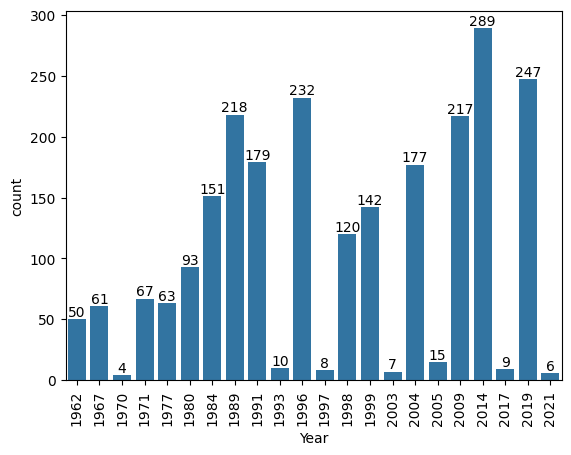

In [16]:
# no of years from the data
#univariate analysis
ax = sns.countplot(x = data["Year"].sort_values())
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

In [17]:
win_party = data[data["Position"] == 1]
win_party

,Assembly_No,Year,Position,Candidate,Sex,Party,Votes,Valid_Votes,Electors,Constituency_Name,...,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,Party_Type_TCPD,Turncoat,Incumbent,MyNeta_education,TCPD_Prof_Main,Result
0,17,2019,1,Rajmohan Unnithan,M,INC,474961,1100051,1363937,KASARAGOD,...,43.18,no,40438,3.68,National Party,False,False,Graduate,Social Work,1
10,17,2019,1,K. SUDHAKARAN,M,INC,529741,1053842,1266550,KANNUR,...,50.27,no,94559,8.97,National Party,False,False,Post Graduate,Social Work,1
24,17,2019,1,K. MURALEEDHARAN,M,INC,526755,1065619,1288926,VADAKARA,...,49.43,no,84663,7.94,National Party,True,False,Graduate,Politics,1
37,17,2019,1,Rahul Gandhi,M,INC,706367,1092197,1359679,WAYANAD,...,64.67,no,431770,39.53,National Party,False,True,Post Graduate,Politics,1
58,17,2019,1,M.K.RAGHAVAN,M,INC,493444,1076193,1318024,KOZHIKODE,...,45.85,no,85225,7.92,National Party,False,True,Graduate,Social Work,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,3,1962,1,G. RAVINDRA VARMA,M,INC,184054,303647,436674,THIRUVALLA,...,60.61,no,74064,24.39,National Party,False,False,Not Available,NaN,1
2356,3,1962,1,ACHUTHAN,M,INC,149244,300871,422829,MAVILEKARA,...,49.60,no,7288,2.42,National Party,False,False,Not Available,NaN,1
2359,3,1962,1,SREEKANTAN NAIR,M,RSP,199377,333799,442109,QULLON,...,59.73,no,64955,19.46,State-based Party,False,False,Not Available,NaN,1
2361,3,1962,1,M. K. KUMARAN,M,CPI,168927,304635,437189,CHIRAYINKIL,...,55.45,no,33219,10.90,State-based Party,False,False,Not Available,NaN,1


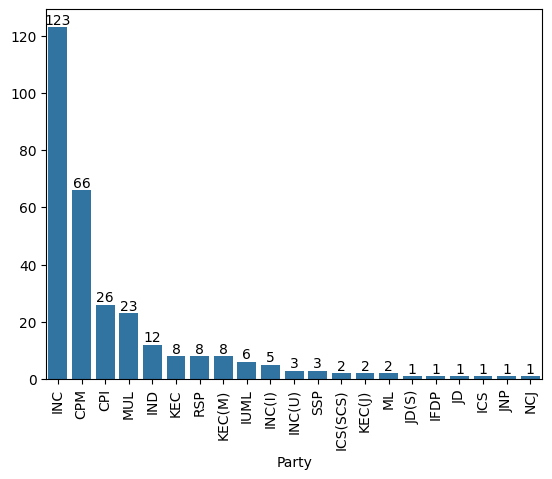

In [18]:
# election won by differnt parties from 1962-2021
ax = sns.barplot(y = win_party["Party"].value_counts().values, x = win_party["Party"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [19]:
# no of electors in each year from all the constituents

electors = data.groupby("Year")["Electors"].sum()

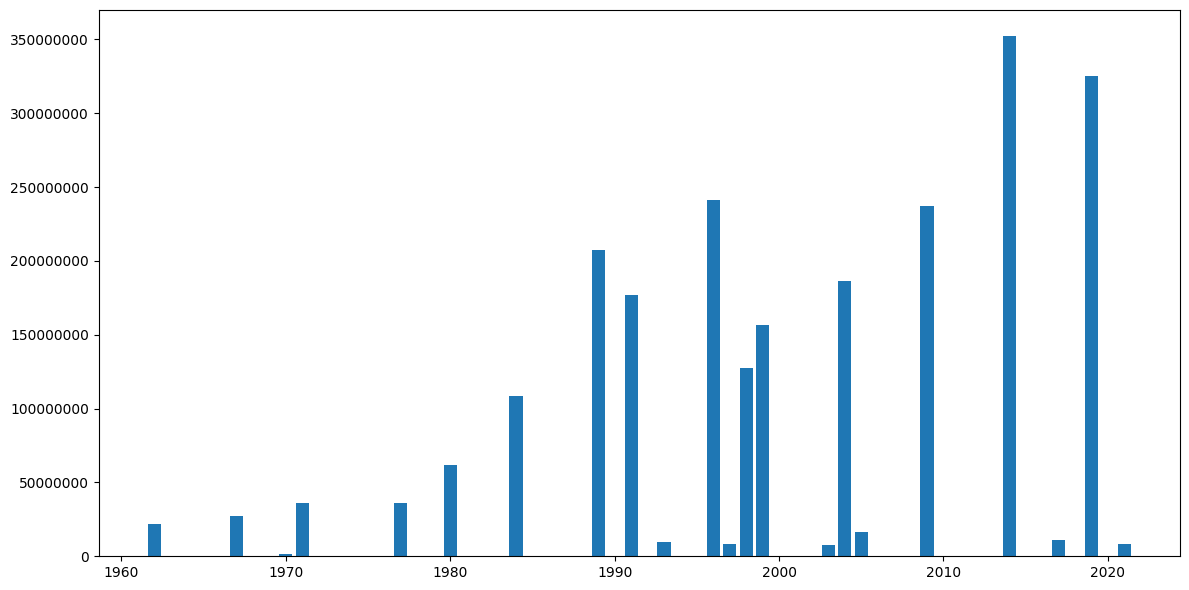

In [20]:
plt.figure(figsize=(12, 6))

plt.bar(electors.index, electors.values)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

Kruskal-Wallis Test: Statistic = 1149.226492927791, p-value = 8.775936826179682e-188


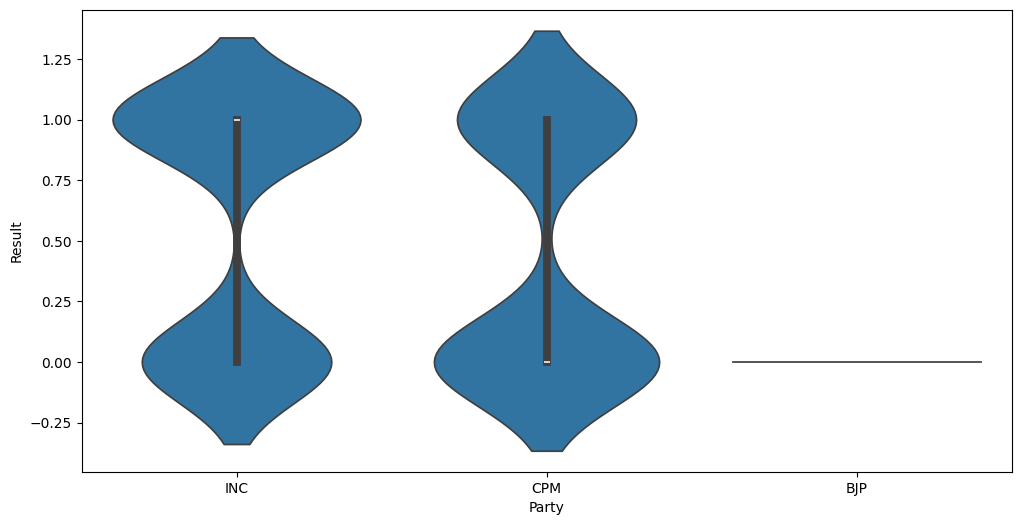

In [21]:
# violin plot for understanding the relation ships btw "Party and Results"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the election results associated with different party types.

from scipy.stats import kruskal

party_national = data[data["Party"].isin(["INC","CPM","BJP"])]


plt.figure(figsize=(12,6))
sns.violinplot(data=party_national, y="Result", x = "Party")



# Perform Kruskal-Wallis test
result_by_party_type = [data['Result'][data['Party'] == party_type] for party_type in data['Party'].unique()]
kruskal_stat, p_value = kruskal(*result_by_party_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")